In [1]:
%matplotlib inline
from matplotlib import style, colors
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

#Measurement reference
Measurement = Base.classes.measurement

#Station measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#observe columns in class with dir()
dir(Measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date= dt.date(2017, 8, 23)
most_recent_date

datetime.date(2017, 8, 23)

In [12]:
# Calculate the date one year from the last date in data set.
year_prior= most_recent_date - dt.timedelta(days=365)
year_prior

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.prcp, 
                        Measurement.date)\
                  .filter(Measurement.date > year_prior)\
                    .filter(Measurement.prcp != None).all()      #!= None  is sqlAlchemy equivalent to notnull()

#print list to observe for list comprehension
# results

# List comprehension solution
prcp_rows = [{"Date": result[1], "Precipitation": result[0]} for result in results]
prcp_rows

[{'Date': '2016-08-24', 'Precipitation': 0.08},
 {'Date': '2016-08-25', 'Precipitation': 0.08},
 {'Date': '2016-08-26', 'Precipitation': 0.0},
 {'Date': '2016-08-27', 'Precipitation': 0.0},
 {'Date': '2016-08-28', 'Precipitation': 0.01},
 {'Date': '2016-08-29', 'Precipitation': 0.0},
 {'Date': '2016-08-30', 'Precipitation': 0.0},
 {'Date': '2016-08-31', 'Precipitation': 0.13},
 {'Date': '2016-09-01', 'Precipitation': 0.0},
 {'Date': '2016-09-02', 'Precipitation': 0.0},
 {'Date': '2016-09-03', 'Precipitation': 0.0},
 {'Date': '2016-09-04', 'Precipitation': 0.03},
 {'Date': '2016-09-07', 'Precipitation': 0.05},
 {'Date': '2016-09-08', 'Precipitation': 0.0},
 {'Date': '2016-09-09', 'Precipitation': 0.03},
 {'Date': '2016-09-10', 'Precipitation': 0.0},
 {'Date': '2016-09-11', 'Precipitation': 0.05},
 {'Date': '2016-09-12', 'Precipitation': 0.0},
 {'Date': '2016-09-13', 'Precipitation': 0.02},
 {'Date': '2016-09-14', 'Precipitation': 1.32},
 {'Date': '2016-09-15', 'Precipitation': 0.42},
 {

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df= pd.DataFrame(prcp_rows).set_index("Date")
prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [15]:
# Sort the dataframe by date

master_prcp_df= prcp_df.sort_values(by= 'Date')
master_prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


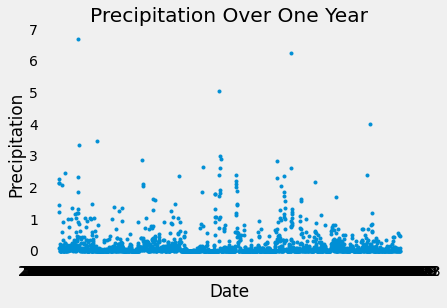

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

fig1, ax1 = plt.subplots()

x_date= master_prcp_df.index
y_precipitation= master_prcp_df['Precipitation']

ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation')
ax1.set_title('Precipitation Over One Year')

ax1.plot(x_date, y_precipitation, '.')


# Set a grid on the plot
plt.grid()

plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [18]:
# Observe Station 

dir(Station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'station']

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)


# List the stations and the counts in descending order.

station_act_sess= session.query(Measurement.station, func.count(Measurement.station).label('Station Activity'))\
    .group_by(Measurement.station)\
    .order_by(desc('Station Activity')).all()

# station_act_sess

station_activity= [{'Station': result[0], 'Activity': result[1]} for result in station_act_sess]
station_activity

[{'Station': 'USC00519281', 'Activity': 2772},
 {'Station': 'USC00519397', 'Activity': 2724},
 {'Station': 'USC00513117', 'Activity': 2709},
 {'Station': 'USC00519523', 'Activity': 2669},
 {'Station': 'USC00516128', 'Activity': 2612},
 {'Station': 'USC00514830', 'Activity': 2202},
 {'Station': 'USC00511918', 'Activity': 1979},
 {'Station': 'USC00517948', 'Activity': 1372},
 {'Station': 'USC00518838', 'Activity': 511}]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# mas stands for most active station
mas_data_sess= session.query(Measurement.station, func.min(Measurement.tobs).label('Lowest Temperature'), func.max(Measurement.tobs).label('Highest Temperature'), func.avg(Measurement.tobs).label('Average Temperature'))\
              .filter(Measurement.station == 'USC00519281').all()

#observe
mas_data_sess


mas_data= [{'Station': result[0], 'Lowest Temperature': result[1], 'Highest Temperature': result[2], 'Averager Temperature': result[3]} for result in mas_data_sess]
mas_data


[{'Station': 'USC00519281',
  'Lowest Temperature': 54.0,
  'Highest Temperature': 85.0,
  'Averager Temperature': 71.66378066378067}]

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Most Active Staion: USC00519281

temp_results = session.query(Measurement.station, Measurement.tobs, \
                        Measurement.date)\
                  .filter(Measurement.date > year_prior)\
                    .filter(Measurement.station == 'USC00519281')\
                    .filter(Measurement.tobs != None).all()      #!= None  is sqlAlchemy equivalent to notnull()

#print list to observe for list comprehension
# temp_results

# List comprehension solution
temp_rows = [{"Date": result[2], "Temperature": result[1]} for result in temp_results]
temp_rows


[{'Date': '2016-08-24', 'Temperature': 77.0},
 {'Date': '2016-08-25', 'Temperature': 80.0},
 {'Date': '2016-08-26', 'Temperature': 80.0},
 {'Date': '2016-08-27', 'Temperature': 75.0},
 {'Date': '2016-08-28', 'Temperature': 73.0},
 {'Date': '2016-08-29', 'Temperature': 78.0},
 {'Date': '2016-08-30', 'Temperature': 77.0},
 {'Date': '2016-08-31', 'Temperature': 78.0},
 {'Date': '2016-09-01', 'Temperature': 80.0},
 {'Date': '2016-09-02', 'Temperature': 80.0},
 {'Date': '2016-09-03', 'Temperature': 78.0},
 {'Date': '2016-09-04', 'Temperature': 78.0},
 {'Date': '2016-09-05', 'Temperature': 78.0},
 {'Date': '2016-09-06', 'Temperature': 73.0},
 {'Date': '2016-09-07', 'Temperature': 74.0},
 {'Date': '2016-09-08', 'Temperature': 80.0},
 {'Date': '2016-09-09', 'Temperature': 79.0},
 {'Date': '2016-09-10', 'Temperature': 77.0},
 {'Date': '2016-09-11', 'Temperature': 80.0},
 {'Date': '2016-09-12', 'Temperature': 76.0},
 {'Date': '2016-09-13', 'Temperature': 79.0},
 {'Date': '2016-09-14', 'Temperatu

In [23]:
temp_df= pd.DataFrame(temp_rows).set_index('Date').sort_values(by= 'Date')
temp_df

,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


In [24]:
#look for min and max temp in this range for bins

# temp_df.Temperature.min()
temp_df.Temperature.max()

83.0

In [25]:
# Create the bins in which Data will be held
temp_bins = [59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83]

temp_bin_names = ['59-61', '61-63', '63-65', '65-67', '67-69', '69-71', '71-73', '73-75', '75-77', '77-79', '79-81', '81-83']

In [26]:
# use pd.cut to add column with appropriate corresponding bins

temp_df["Temperature Range"] = pd.cut(temp_df["Temperature"], temp_bins, labels=temp_bin_names, include_lowest=True)
temp_df

,Temperature,Temperature Range
Date,,
2016-08-24,77.0,75-77
2016-08-25,80.0,79-81
2016-08-26,80.0,79-81
2016-08-27,75.0,73-75
2016-08-28,73.0,71-73
...,...,...
2017-08-14,77.0,75-77
2017-08-15,77.0,75-77
2017-08-16,76.0,75-77


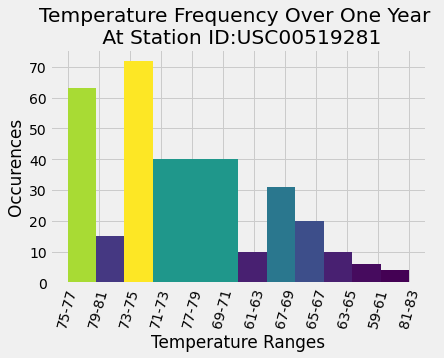

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data

#figure out binssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss

fig2, ax2 = plt.subplots()

x_temp_ranges= temp_df['Temperature Range']
# y_temperature= temp_df['Temperature']

ax2.set_xlabel('Temperature Ranges')
plt.xticks(rotation = 75) # Rotates X-Axis Ticks by 45-degrees
ax2.set_ylabel('Occurences')
ax2.set_title('Temperature Frequency Over One Year \n At Station ID:USC00519281')



ax2.hist(x_temp_ranges, bins=12, density=True)








#test
N, bins, patches = ax2.hist(x_temp_ranges, bins=12)

# N, bins, edges = ax2.hist(x_temp_ranges, bins=12, edgecolor='k')

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

    
ax2.hist(x_temp_ranges, bins=12, density=True)
    
    
    
    
# plt.figure(figsize=(200,10),facecolor='red',edgecolor='blue')
plt.show()



# Close session

In [28]:
# Close Session
session.close()